<center><FONT size="6pt" color=firebrick> Résoudre une équation algébrique </FONT></center>
<img src="img/extraitProgramme.png" width="800">


**Ingénierie numérique**

On s'intéresse à l'utilisation de la bibliothèque Numpy pour répondre à des problèmes très courants de l'ingénierie ou la recherche en général. Pour mettre en oeuvre de ces **méthodes numériques**, nous avons besoin d'importer la bibliothèque Numpy et Matplotlib.pyplot.

In [ ]:
import matplotlib.pyplot as plt # import des modules
import numpy as np

# Objectif : résolution une équation non linéaire à une inconnue

Nous souhaitons résoudre une équation dans laquelle l'inconnue est un nombre réel $x$ dont la solution est supposée exister et être unique sur un intervalle $I\subset\mathbb{R}$.

*Remarque préliminaire*

> Toute équation de la forme $$\mathscr{l}(x)=\mathscr{r}(x)$$ 
>
>  peut se ramener à la **recherche du zéro**  de la fonction $f: x \mapsto  \mathscr{l}(x)-\mathscr{r}(x)$.

# Recherche des zéros d'une fonction

**Problématique :**

Soit $f$ une fonction numérique ($\mathbb{R} \to \mathbb{R}$) **continue** et **strictement monotone** sur l'intervalle $I=[ a \quad b ]$ et telle que $f(a)$ et $f(b)$ soient non nuls et de signes opposés, c'est-à-dire tels que :

$$f(a)\times f(b) <0$$

alors l'équation
$$f(x)=0 $$ admet une unique solution sur l'intervalle $I=[ a, b ]$.

> La valeur de $x$ est appelée *le zéro de f* sur $[ a \quad b ]$.

**Résolution approchée :**

> Nous allons décrire deux algorithmes itératifs permettant d'obtenir, de la solution $x$, un encadrement *aussi précis que l'on veut*, c'est-à-dire une valeur approchée de la solution.

> Chaque algorithme construit ainsi une suite finie de réels $x_0$, $x_1$, $x_2$, ..., $x_k$ qui tend vers $x$.

> En pratique, la **précision du zéro** est limitée par la représentation des réels en tant qu'objet ``float`` et les arrondis lors des calculs successifs. Généralement, l'erreur relative sur la valeur du zéro est ainsi, au mieux, de l'ordre de $10^{-15}$ à $10^{-16}$.




**Ne pas confondre :**

+ la valeur approchée du zéro, c'est-à-dire sa valeur $x_k$ lors la k-ième itération avec k "grand",
+ avec la valeur $f(x_k)$ que prend la fonction en ce point (que l'on souhaiterait nulle, mais qui ne l'est pas rigoureusement).

Selon les cas, la précision de la méthode sera quantifiée par
+ ou bien la distance entre $x_k$ et $x$, on s'impose dans ce cas que $|x_k-x|<\varepsilon_x$
+ ou bien par la valeur que prend la fonction $f$ au point $x_k$, on s'impose dans ce cas que $|f(x_k)|<\epsilon_f$.

> Le premier critère, en $\varepsilon_x$, est défini dans l'espace des $x$, c'est-à-dire l'*espace de départ*.

> Le second critère, en $\varepsilon_f$, est défini dans l'espace des $f(x)$, c'est-à-dire l'*espace des images*.

> Exemple physique : $x$ peut être une position (en mètres), $f(x)$ un effort mécanique (en Newton).


# Méthode de la dichotomie

Principe : 

+ On découpe successivement l'intervalle $[a \quad b ]$ de recherche en deux. 
+ On regarde le signe de $f$ au point milieu puis on poursuit la recherche :
  + ou bien dans $[a \quad m]$  
  + ou bien dans $[m \quad b]$.
+ On s'arrête lorsque la largeur de l'intervalle de recherche est inférieure à une précision $\epsilon_x$ donnée.

In [1]:
def getZeroDicho(f,a,b,epsilonx=1e-8):
    while abs(b-a) > epsilonx :
        m = (a+b) / 2                # point milieu
        if f(m)*f(a) < 0 : # f(m) et f(a) sont-ils de signes opposés?
            b = m  # dans ce cas, on poursuit dans l'intervalle [a m]
        else:
            a = m  # dans ce cas, on poursuit la recherche dans [m b]
    return (a + b)/2  # ne pas oublier de retourner le résultat 

Exemple, avec la fonction $f_1 : x \to f_1(x)=x^3/6-x+1/2$ dont on cherche le zéro sur $[1 \quad 3 ]$.

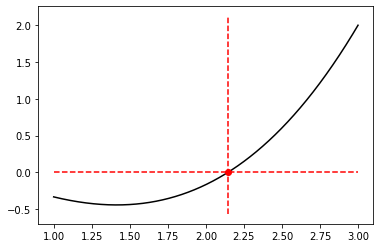

Le zéro de la fonction est :  2.1451026909053326  à 1e-8 près


In [8]:
## Définition de la fonction
def f1(x):
    return x**3/6-x+1/2 # définition de la fonction

## Tracé de la fonction
xi = np.linspace(1, 3, 10**6) # valeurs sur l'intervalle [1;3]
plt.plot(xi,f1(xi),'-k')      # tracé en trait noir

## Détermination du zéro grâce à la fonction dichotomie
x0 = getZeroDicho(f1, 1, 3)   # appel de la fonction de recherche dichotomique 

## Affichage graphique de la solution
plt.plot(x0,f1(x0),'or')    # 'o' = cercle, 'r' = rouge
plt.plot([1,3],[0,0],'--r') #
yl0=plt.ylim() # récupère les limites [ymin, ymax] de l'axe y
plt.plot([x0,x0],yl0,'--r') #
plt.show()
print('Le zéro de la fonction est : ',x0, ' à 1e-8 près')

**Remarque :**

> A chaque itération, on divise par deux la largeur de l'intervalle de recherche.

> Le nombre $n$ d'itérations pour obtenir un encadrement de $x_0$ à $\varepsilon_x$ près en partant d'un intervalle de largeur initiale $(b-a)$ est donc de l'ordre de:
$$\frac{b-a}{2^n} \sim \varepsilon_x$$
Soit $$n\sim \log_2\left(\frac{b-a}{\varepsilon_x}\right)$$

> Dans notre exemple, $b-a = 3-1=2$ et $\varepsilon_x = 10^{-8}$, donc $n \sim \log_2(2/10^{-8})=\ln(2/10^{-8})/\ln(2)\approx 27,57$

La méthode converge donc en 28 itérations environ.

# Méthode de Newton (complément hors programme)

**Remarque :** la méthode de Newton permet la recherche du zéro d'une fonction $f : x\to f(x)$ mais **suppose que l'on ait accès aux valeurs numériques de sa dérivée** : $$\frac{\mathrm{d} f}{\mathrm{d} x} \quad \textrm{doit être connue numériquement}$$
<img src="img/Newton_iteration.png" width="300">

Principe : 

Soit $x_n$ une valeur approchée du zéro de $f$ à l'itération $n$:

+ on approxime la fonction $f$ à une fonction linéaire en utilisant la valeur de $f(x_n)$ et de sa dérivée au point $x_n$, $\left.\frac{\mathrm{d} f}{\mathrm{d} x}\right|_{x_n}$
+ on calcule ensuite l'abscisse du point d'intersection de l'axe des abscisses avec cette approximation linéaire (c'est-à-dire avec la tangente à la courbe au point $x_n$, en rouge sur la figure précédente).
+ le point d'intersection $x_{n+1}$ est la valeur approchée à l'itération $n+1$.

On en déduit l'expression de $x_{n+1}$ en fonction de $x_n$ et des prises par $f$ et sa dérivée au point $x_n$:
$$x_{n+1}=x_n-\frac{f(x_n)}{\frac{\mathrm{d} f}{\mathrm{d} x}(x_n)}$$

**Condition d'arrêt :**

En général, la convergence de la méthode n'est pas garantie. Voici les critères d'arrêt possibles :

+ $|x_{n+1}-x_{n}|<\varepsilon_x$, l'écart entre deux termes successifs est suffisamment faible, c'est la plus commune.
+ $|x_{n+1}-x_{n}|/|x_{n+1}|<\varepsilon_x$, l'écart relatif entre deux termes successifs est suffisamment faible.
+ $|f(x_{n+1}|<\varepsilon_f$, la valeur de $f$ est suffisamment proche de zéro.
+ $n>n_{\textrm{MAX}}$, le nombre d'itérations dépasse une valeur limite (c'est le cas où la méthode ne converge pas).

In [10]:
def getZeroNewton(f,df,x0,epsilonx=1e-8,nMax=100): # la fonction f et sa dérivée df sont fournies en argument
    n=0 # nombre d'itérations
    x1=x0-f(x0)/df(x0)
    while (abs(x1-x0)>epsilonx) and (n<nMax) : # ATTENTION à la condition d'arrêt !
        x0=x1 # on décale le point n -> n+1
        n+=1  # comptage des iterations pour la condition d'arret relative à nMax
        x1=x0-f(x0)/df(x0)
    return (x1,n) # renvoie la valeur approchée du zéro et le nombre d'itérations

Exemple : pour la fonction $f_1 : x \to f_1(x)=x^3/6-x+1/2$ de dérivée $df_1 : x \to x^2/3 -1$

In [12]:
f1 = lambda x:x**3/6-x+0.5 # mot clé "lambda" = compact pour définir les fonctions
df1 = lambda x:x**2/2-1    # fonction dérivée
print(getZeroNewton(f1,df1,3)) # x0=3

(2.1451026912004223, 5)


La méthode converge en seulement 5 itérations (contre 28 pour la méthode de dichotomie).
Au niveau des performances, de manière générale : 

        DICHOTOMIE << NEWTON
        
Attention, dans certains cas, si le point de départ est mal choisi la méthode ne converge pas.

 Pour x0 = 0.5, la méthode converge en  5  itérations
 Pour x0 = 1. , la méthode converge en  8  itérations
 Pour x0 = 3., au bout de n =  100  itérations, la méthode renvoie  9.498636739889094e+24


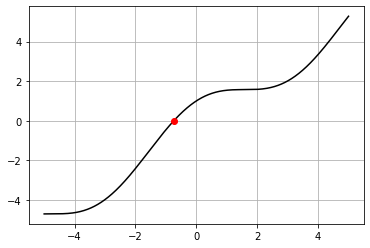

In [14]:
f2  = lambda x:x+np.cos(x)
df2 = lambda x:1-np.sin(x)
xi  = np.linspace(-5,5,1000)
plt.plot(xi,f2(xi),'-k') #
plt.grid(True)
xA,nA=getZeroNewton(f2,df2,.5,1e-12) # on part de 1
plt.plot(xA,f2(xA),'or') # affiche du zero
print(' Pour x0 = 0.5, la méthode converge en ', nA,' itérations')
xB,nB=getZeroNewton(f2,df2,1.,1e-12) # on part de 1
print(' Pour x0 = 1. , la méthode converge en ', nB,' itérations')
xC,nC=getZeroNewton(f2,df2,3.,1e-12) # on part de 1
print(' Pour x0 = 3., au bout de n = ',nC,' itérations, la méthode renvoie ',xC)

**Remarque 1:**

> Si la dérivée n'est pas connue, on peut l'estimer numérique par un schéma de différences finies (voir précédemment).

**Remarque 2:**

> On peut adapter la méthode de Newton au recherche du minimum d'une fonction suffisamment régulière car chercher le minimum d'une fonction $f$ revient à chercher l'annulation de sa dérivée. En effet, 

> si $x_0$ est un minimum de $f$, alors $g=\frac{\mathrm{d} f}{\mathrm{d} x}$ est nul en $x_0$. Cela revient à appliquer la méthode de Newton à la fonction $g$.

**Remarque 3:**

> La méthode de Newton possède de nombreuses généralisations dans le cas où $f$ est un champ scalaire en dimension $n$ (*i.e*, une fonction de $\mathbb{R^n} \to \mathbb{R}$), mais leur étude est hors programme.

# Dichotomie : utilisation de bisect de scipy.optimize

Le sous module ``optimize`` du module scipy possède une fonction qui implémente la recherche du zéro par dichotomie.

In [17]:
# import du sous module
import scipy.optimize as opt # opt est un alias sur le sous-module optimize

help(opt.bisect) # aide sur la fonction bisect

Help on function bisect in module scipy.optimize.zeros:

bisect(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=False, disp=True)
    Find root of a function within an interval using bisection.
    
    Basic bisection routine to find a zero of the function `f` between the
    arguments `a` and `b`. `f(a)` and `f(b)` cannot have the same signs.
    Slow but sure.
    
    Parameters
    ----------
    f : function
        Python function returning a number.  `f` must be continuous, and
        f(a) and f(b) must have opposite signs.
    a : scalar
        One end of the bracketing interval [a,b].
    b : scalar
        The other end of the bracketing interval [a,b].
    xtol : number, optional
        The computed root ``x0`` will satisfy ``np.allclose(x, x0,
        atol=xtol, rtol=rtol)``, where ``x`` is the exact root. The
        parameter must be nonnegative.
    rtol : number, optional
        The computed root ``x0`` will satisfy ``np.allclose(

## Exemple d'utilisation de la fonction bisect

Soit la fonction $f_1 : x \to f_1(x)=x^3/6-x+1/2$ dont on cherche le zéro sur l'intervalle $[1 ; 3 ]$.

In [23]:
## Définition de la fonction dont on cherche le zéro
def f1(x):
    return x**3/6-x+1/2 # définition de la fonction

In [27]:
## Appel de la fonction bisect le résultat étant stockée dans x0
x0 = opt.bisect(f1, 1, 3)# fonction, bornes min et max de l'intervalle, 
                         # les autres paramètres sont optionnels
print('x0 = ',x0) # valeur approché du zéro

x0 =  2.145102691201828


<center><FONT size="6pt" color=firebrick> Exercices d'entraînement </FONT></center>

# N4 n°1 Point de fonctionnement de deux dipôles (à chercher)

On cherche à déterminer, par le calcul, les coordonnées $(U_F,I_F)$ du point de fonctionnement du circuit ci-dessous constitué d'un générateur connecté à une diode.

| | |
|:--:|:--:|
|<img src="img/schemaDiodeGene.png"  width =310> | <img src="img/pointFonctionnement.png" width="300" >|
|schéma électrique des deux dipôles | intersection des caractéristiques des deux dipôles|

**La caractéristique du générateur** (association d'une source idéale de tension et d'une résistance) est celle d'un dipôle linéaire. 

Elle est donnée par la relation
$$U(I) = E-RI$$

**La caractéristique de la diode** est celle d'un dipôle non linéaire.

On suppose qu'elle est donnée par la relation 
$$I(U) = I_s\left( \exp\left(\frac{e(U)}{\eta k_BT}\right)-1\right)$$
avec

- $k_B = \textrm{1,380649 10}^{-23} \textrm{ J.K}^{-1}$ la constante de Boltzmann,
- $e= \textrm{1,602176634 10}^{-19} \textrm{ C}$ la charge élémentaire,
- $T$ la température thermodynamique de la diode (en kelvins),
- $I_s=\textrm{2 10}^{-12} \textrm{ A}$ le courant de saturation qui dépend des dimensions internes au composant,
- $\eta\approx 1,2$ le facteur d'idéalité pour la diode considérée. 


**Questions**

a) Définir la fonction Python ``Idiode(U)`` qui, à partir de la tension $U$ (en volts), renvoie l'invensité $I$ du courant dans la diode (en ampères). On prendra une température $T= \textrm{ 35 °C}$

b) Tracer la caractéristique $I=f(U)$ de la diode pour $U$ variant $-1\textrm{ V}$ à $\textrm{+0,8 V}$.

c) Tracer sur le même graphe la caractéristique $I=g(U)$ du générateur pour $E= 1,5\textrm{ V}$ et $R = 20 \,\Omega$.

d) Déterminer la valeur approchée des coordonnées $I_F,U_F$ du point de fonctionnement du circuit en résolvant l'équation non-linéaire suivante

$$g(U) = f(U)$$

à l'aide de la fonction *bisect(f,a,b)* du module *scipy.optimize*.

e) En déduire la valeur numérique de la puissance $P=UI$ dissipée par la diode lorsqu'elle est connetée à ce générateur.

On s'aidera de la **trame ci-dessous**.

In [ ]:
## import des modules
 # à compléter # pour les fonctions mathématiques (exp)
 # à compléter # pour les fonctions graphiques

## a) Définition de la fonction Idiode
def Idiode(U):
    # constantes physiques
    kB = 1.380649e-23 # J/K constante de Boltzmann
    e = 1.602176634e-19# C charge élémentaire
    T = 273.15 + 35 # 35°C converti en kelvins
    Is = 2e-12 # ampères
    eta = 1.2 # facteur d'idéalité (sans dimension)
    return  # à compléter
               
## b) Tracé de la caractéristique pour U variant entre -1V et +0,8 V
Ui=# à compléter # tableau numpy des valeurs en abscisses
plt.plot( # à compléter   # caractéristique de la diode en trait bleu
plt.xlabel('U (V)') # titre de l'axe horizontal
plt.ylabel('I (A)') # titre de l'axe vertical
plt.title('Caractéristique I-U de la diode')
plt.grid()     

In [ ]:
## c) Superposition de la caractéristique du générateur
E, R = 1.5,  20. # volts, ohms
Ig = # à compléter # valeurs des tensions du générateur
plt.plot( ... ,label='diode')  # à compléter      # caractéristique du générateur en trait rouge
plt.plot(... ,'-b',label='générateur')# à compléter # caractéristique de la diode en trait bleu
plt.xlabel('U (V)') # titre de l'axe horizontal
plt.ylabel('I (A)')
plt.title('Caractéristique I-U de la diode')
plt.legend()
plt.grid()

In [ ]:
## Définition de la fonction f à annuler
def f(U):
    return # à compléter # fonction U -> "différence des intensités des courants dans les dipôles"

## Appel de la fonction bisect
# à compléter # import du module optimize de scipy
Uf = # à compléter # l'intersection est cherchée dans l'intervalle des tensions U comprises entre 0 et 0,8V

## Affichage du résultat
If = Idiode(Uf) # calcul de la valeur du courant
print("Les coordonnées du point F de fonctionnement sont Uf = ",...) # à compléter # affichage de Uf et If

In [ ]:
## e) Puissance dissipée la diode
print('Puissance dissipée P = Uf x If = ',...) # à compléter # puissance avec l'unité correcte.

**Correction N4 n°1 : point de fonctionnement**

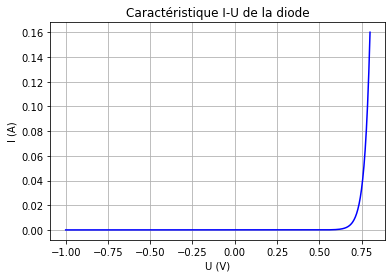

In [30]:
## import des modules
import numpy as np # pour les fonctions mathématiques (exp)
import matplotlib.pyplot as plt # pour les graphiques

## a) Définition de la fonction Idiode

def Idiode(U):
    # constantes physiques
    kB = 1.380649e-23 # J/K constante de Boltzmann
    e = 1.602176634e-19# C charge élémentaire
    T = 273.15 + 35 # 35°C converti en kelvins
    Is = 2e-12 # ampères
    eta = 1.2 # facteur d'idéalité (sans dimension)
    return Is*(np.exp((e*U)/(eta*kB*T))-1)
               
## b) Tracé de la caractéristique pour U variant entre -1V et +0,8 V
Ui=np.linspace(-1, 0.8, 10**3) # tableau numpy des valeurs en abscisses
plt.plot(Ui,Idiode(Ui),'-b')   # caractéristique de la diode en trait bleu
plt.xlabel('U (V)') # titre de l'axe horizontal
plt.ylabel('I (A)')
plt.title('Caractéristique I-U de la diode')
plt.grid()     

Pour tracer la caractéristique du générateur en fonction de la tension, on peut "inverser" la relation

$$U(I) = E-RI$$
qui s'écrit également
$$I(U) =\frac{E-U}{R}$$

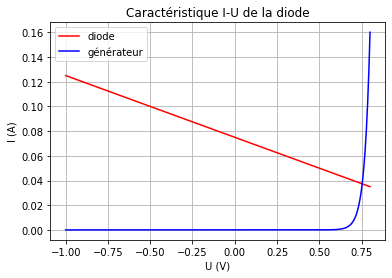

In [31]:
## c) Superposition de la caractéristique du générateur
E, R = 1.5,  20. # volts, ohms
Ig = (E-Ui)/R # valeurs des tensions du générateur
plt.plot(Ui, Ig,'-r',label='diode')        # caractéristique du générateur en trait rouge
plt.plot(Ui,Idiode(Ui),'-b',label='générateur') # caractéristique de la diode en trait bleu
plt.xlabel('U (V)') # titre de l'axe horizontal
plt.ylabel('I (A)')
plt.title('Caractéristique I-U de la diode')
plt.legend()
plt.grid()

d) Pour déterminer les coordonnées du point de fonctionnement, il est nécessaire de définir la **fonction à annuler**.

Le point de fonctionnement se situe à l'intersection des deux courbes. Ses coordonnées $U_F, I_F$ vérifient donc l'équation

$$I_F = \textrm{Idiode}(U_F) = \textrm{Ig}(U_F)$$

On peut donc choisir pour fonction à annuler la fonction $f$ suivante

$$f : U \mapsto  \textrm{Idiode}(U) - \textrm{Ig}(U)$$

Il ne reste plus qu'à définir cette fonction en Pyhton et à appeler la méthode de recherche *bisect(f,a,b)* du module scipy.optimize.

In [36]:
## Définition de la fonction f à annuler
def f(U):
    return Idiode(U)-(E-U)/R # fonction U -> "différence des intensités des courants dans les dipôles"

## Appel de la fonction bisect
import scipy.optimize as opt # import du module optimize de scipy
Uf = opt.bisect(f, 0, 0.8) # l'intersection est cherchée dans l'intervalle des tensions U comprises entre 0 et 0,8V

## Affichage du résultat
If = Idiode(Uf) # calcul de la valeur du courant
print("Les coordonnées du point F de fonctionnement sont Uf = ",Uf," V ; If = ",If," A")

Les coordonnées du point F de fonctionnement sont Uf =  0.7536001647138618  V ; If =  0.03731999176424508  A


Conclusion : $$U_f \approx 754 \textrm{ mV} \quad \textrm{et}\quad I_f= \textrm{ 37,3 mA}$$

In [37]:
## e) Puissance dissipée la diode
print('Puissance dissipée P = Uf x If = ',Uf*If,' W')

Puissance dissipée P = Uf x If =  0.02812435194065506  W


La puissance dissipée la diode vaut $P=\textrm{ 28,1 mW}$.


# N4 n°2 Détermination d'un avancement à l'équilibre (exercice corrigé)

On considère la transformation du bromure de nitrosyle (NOBr (g)) en monoxyde d’azote (NO (g)) et dibrome (Br2 (g)) qui est effectuée dans un contenant sous la pression $p = \textrm{ 4,58 bar}$ maintenue fixe. Le bilan réactionnel est le suivant :

$$2 \textrm{NOBr(g)}\rightleftharpoons 2 \textrm{NO (g)}+ 2 \textrm{Br}_2\textrm{(g)}$$

La constante d’équilibre  $\textrm{K}^0(T)$ de ce bilan réactionnel est donnée en fonction de la température $T$ dans le tableau ci-dessous.

| T (°C)  | 25     | 50    | 100   | 700 |
|---------|--------|-------|-------|-----|
| $\textrm{K}^0(T)$ | 0,0095 | 0,030 | 0,111 | 34  |

On souhaite déterminer la valeur de l'avancement à l'équilibre $\xi_{éq}$ à 100°C lorsque le réactif ``NOBr`` est initialement seul dans le réacteur à pression constante.

Le nombre de moles initiales est  $n_0(\textrm{NOBr} = \textrm{2 mol}$.

Pour cela, nous définissons la fonction qui, à l'avancement $\xi$, associe la valeur du quotient réactionnel $Q_r$ pour :
- un nombre de moles initial $n_0$ en ``NOBr`` introduit initialement seul,
- et pour une pression totale $p$ du mélange réactionnel.

Remarques: en Python, nous choisissons d'exprimer $p$ en bar et $n_0$, $\xi$ en moles.

Nous avons donc
$$Q_r(\xi)=\frac{4 \xi^3}{(2-2\xi)^2(2+\xi)} \left(\frac{p}{p^0} \right)$$

a) Sachant qu'à l'équilibre le quotient réactionnel $Q_r(\xi)$ est égal à la constante $\textrm{K}^0(T)$ de réaction, proposer une fonction numérique $f : \xi \mapsto f(\xi)$ dont on doit chercher l'annulation afin de déterminer la valeur $\xi=\xi_{éq}$.

b) Ecrire le code Python qui définit cette fonction. Calculer $Q_r(\xi = 0.5)$. Que peut-on conclure de ce résultat?

c) Déterminer le zéro de cette fonction. On utilisera pour cela fonction ```bisect(f,a,b)``` renvoyant un zéro de $f$ sur l'intervalle $[a;b]$.

d) Déterminer la nouvelle valeur d'avancement d'équilibre $\xi_{éq,2}$ si on porte le même mélange réactionnel à 700°C.

e) Conclure : quel est l'effet d'une augmentation de la température sur l'équilibre ?


**Correction de N4 n°1**

a) L'équation $$Q_r(\xi)=\textrm{K}^0(T)$$ s'écrit également
$$Q_r(\xi)-\textrm{K}^0(T)=0$$


On se ramène donc à chercher l'annulation de la fonction $f : \xi \mapsto Q_r(\xi)-\textrm{K}^0(T)$.

b) On définit la fonction en Python.

Notons qu'il est toujours judicieux de travailler avec des valeurs littérales préalablement définies. Cela permet de s'adapter rapidement à des éventuelles modifications des valeurs.

In [38]:
## Définition de la fonction 
n0 = 2.   # (mol)
p, p0  = 4.58, 1 # (bar)
def Qr(x):
    return (p/p0)*(4*x**3)/((n0 - 2*x)**2 * (n0 + x))
def f(x):
    return Qr(x)-0.111 # Qr(x)-K

In [39]:
## Définition de la fonction (avec les lambdas fonctions)
n0 = 2.   # (mol)
p, p0  = 4.58, 1 # (bar)
Qr = lambda x : (p/p0)*(4*x**3)/((n0 - 2*x)**2 * (n0 + x))
f = lambda x: Qr(x)-0.111 # Qr(x)-K

In [40]:
Qr(0.5) # Comme Qr > 0, on en déduit que xi_éq est inférieur à 0.8. Donc que xi_éq est compris entre 0 et 0.8.

0.916

c) Détermination du zéro

Il se pose le problème du choix des bornes de l'intervalle.

Deux possibilités:

1. On raisonne à partir de nos connaissances sur "la chimie" : 
    - On sait que l'avancement $\xi$ va être positif car la réaction va se faire.
    - On sait de plus la valeur maximale de l'avancement ne pourra pas dépasser la valeur qui conduit à la disparition du réactif limitant donc $2\xi<n_0=\textrm{ 2 mol}$.
    - ainsi la recherche peut se faire dans l'intervalle $[0;1]$.
    
    
2. On ne sait rien du résultat *a priori* et on va s'appuyer sur une représentation graphique de la fonction de manière à **"visualiser graphiquement le zéro"** de la fonction.

Enfin, on peut utiliser le sens d'évolution d'un équilibre chimique:

- si $Q_r(\xi)<\textrm{K}^0(T)$ alors la réaction fait augmenter $\xi$ (sens 1 ->)
- si $Q_r(\xi)>\textrm{K}^0(T)$ alors la réaction fait diminuer $\xi$ (sens 2 <-)


In [48]:
f(0.5) # Qr - K

0.805

On en déduit que $Q_r(\xi)>\textrm{K}^0(T)$ donc la valeur d'équilibre de $\xi$ est nécessairement inférieure à $\xi = 0,5$.

On peut donc effectuer la recherche dans l'intervalle $[0 ; 0,5]$.

Text(0, 0.5, '$Q_r(\\xi)$')

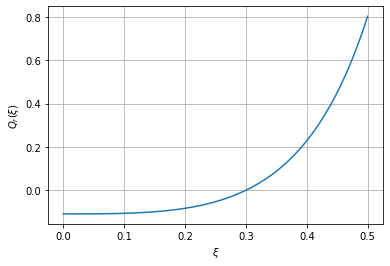

In [49]:
xi = np.linspace(0,0.5,10**3)
plt.plot(xi,f(xi))
plt.grid()
plt.xlabel(r'$\xi$') # texte formaté pour "LaTeX"
plt.ylabel(r'$Q_r(\xi)$') #

In [52]:
# import du sous module optimize de scipy
import scipy.optimize as opt # opt est un alias sur le sous-module optimize

x0 = opt.bisect(f,0,0.8)
print("à 100°C, Valeur de xi à l'équilibre xi = ", x0)

à 100°C, Valeur de xi à l'équilibre xi =  0.30093107411375974


In [56]:
## d) Etude à 700°C
# la fonction f est modifiée car K(700°C) = 34
f = lambda x: Qr(x)-34. # Qr(x)-K 
x0 = opt.bisect(f,0,0.999) # intervalle de recherche augmenté
print("A 700°C, valeur de xi à l'équilibre xi = ", x0)

A 700°C, valeur de xi à l'équilibre xi =  0.8339595395564958


e) **Conclusion :** on constate qu'une augmentation de la tempéature favorise la réaction (l'avancement est augmentée).

## N4 n°3 Portée d'un tir parabolique (à chercher)

La trajectoire d'un point $M$ du plan est décrite par l'équation paramétrique suivante:

$$\left\{
\begin{array}{ll}
        x(t) &= V_0\cos(\alpha)\times t \\
        y(t) & =V_0\sin(\alpha)\times t-\frac{1}{2}g\times t^2+Y_0 \\
    \end{array}
    \right.$$
    
On donne $g=9,81 \textrm{ m.s}^{-2}$, $V_0 = 10,0 \textrm{ m.s}^{-1}$, $\alpha = 35°$ et $Y_0 = \textrm{5,0 m}$.

On s'intéresse à la **portée du tir**, c'est-à-dire la distance parcourue horizontalement lorsque le projectile retombe au sol (plan d'équation $y=0$).

a) Déterminer la date $t_1$ pour laquelle l'ordonnée $y$ s'annule. (On utilisera la fonction *bisect*).

b) En déduire la portée du tir.

On complétera le script Python ci-dessous.

In [67]:
import numpy as np             # import de Numpy
import scipy.optimize as opt   # import de optimize
import matplotlib.pyplot as plt# import de pyplot

g, v0, Y0, alpha = ... # à compléter # valeurs des constantes

def x(t):
    return v0*np.cos(alpha)*t # expression de x(t)

def y(t):
    return # à compléter # expression de y(t)

## à compléter
## Tracé de la fonction


## Recherche du zéro


## Affiche des résultats


**Correction N4 n°3**

data t1 =  1.6406772618374816  s portée =  14.208681881627523  m


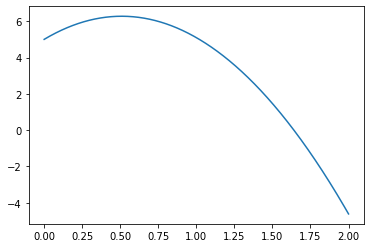

In [70]:
import numpy as np # import de Numpy
import scipy.optimize as opt # import de optimize
import matplotlib.pyplot as plt

g, v0, Y0, alpha = 9.81, 10. ,5.,30*np.pi/180 # constantes

def x(t):
    return v0*np.cos(alpha)*t                # expression de x(t)

def y(t):
    return v0*np.sin(alpha)*t- g*t**2/2 + Y0 # expression de y(t)

## Tracé de la fonction
ti = np.linspace(0,2.,10**3) # intervalle de temps jusqu'à 2 secondes
plt.plot(ti,y(ti)) # tracé de l'évolution temporelle de l'ordonnée y(t)

## Recherche du zéro
t1 = opt.bisect(y,0,2.) # la fonction y : t-> y(t) s'annule entre 0 et 2s

## Affiche des résultats
print("data t1 = ",t1, " s portée = ",x(t1)," m") # portée = x(t1)